# 2021년 4분기 게임 설계 계획 프로젝트

<분석 내용>
- 지역별 인기 게임 장르
- 연도별 게임의 트렌드
- 인기 게임들의 이름 키워드

In [1]:
import pandas as pd

df = pd.read_csv("game.csv")
df = df.iloc[:,1:]
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


# 데이터 전처리

In [2]:
df.info()
#null값 Genre(장르), Year(출시연도), Publisher(제작회사) 변수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [46]:
df.corr(method='pearson')

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,all_sales
Year,1.000000,-0.086834,0.010997,-0.168377,0.058678,-0.070266
NA_Sales,-0.086834,1.000000,0.786253,0.418317,0.699855,0.934716
EU_Sales,0.010997,0.786253,1.000000,0.418113,0.827679,0.915169
JP_Sales,-0.168377,0.418317,0.418113,1.000000,0.315716,0.606692
Other_Sales,0.058678,0.699855,0.827679,0.315716,1.000000,0.810002
all_sales,-0.070266,0.934716,0.915169,0.606692,0.810002,1.000000


## **카이제곱 분석**
 :두 범주형 변수 사이의 유의미한 관계를 파악
- 귀무가설 :두 변주형 변수 사이의 유의미한 관계가 없다
- 대립가설 : 두 변주형 변수 사이의 유의미한 관계가 있다

In [3]:
#Genre와 Name변수
import pandas as pd
cross = pd.crosstab(df['Genre'],df['Name'])
from scipy.stats import chi2_contingency
chi2_contingency(cross)[1]
#0.05보다 작으므로 유의미한 관계가 있다

0.0

In [4]:
#Genre와 Platform 변수
import pandas as pd
cross1 = pd.crosstab(df['Genre'],df['Platform'])
from scipy.stats import chi2_contingency
chi2_contingency(cross1)[1]
#0.05보다 작으므로 유의미한 관계가 있다

0.0

In [5]:
#Genre와 Publisher 변수
import pandas as pd
cross2 = pd.crosstab(df['Genre'],df['Publisher'])
from scipy.stats import chi2_contingency
chi2_contingency(cross2)[1]

0.0

In [6]:
#Genre와 Year 변수
import pandas as pd
cross2 = pd.crosstab(df['Genre'],df['Year'])
from scipy.stats import chi2_contingency
chi2_contingency(cross2)[1]

3.757781362951284e-300

In [7]:
#Year와 Publisher 변수
import pandas as pd
cross4 = pd.crosstab(df['Year'],df['Publisher'])
from scipy.stats import chi2_contingency
chi2_contingency(cross4)[1]

0.0

In [8]:
#Year와 Publisher 변수
import pandas as pd
cross5 = pd.crosstab(df['Year'],df['Platform'])
from scipy.stats import chi2_contingency
chi2_contingency(cross5)[1]

0.0

In [9]:
#Year과 Genre와 가장 연관 없으므로 제외 시키기

In [ ]:
from scipy.stats import mode
genre_null = df[df['Genre'].isnull()].Name.tolist()
List =[]
for i in genre_null:
 print(df[df.Name.str.contains(i)].Genre)

In [ ]:
from scipy.stats import mode
genre_null = df[df['Genre'].isnull()].Platform.tolist()
for i in genre_null:
 print(df[df.Platform == i].Genre)

In [ ]:
from scipy.stats import mode
genre_null = df[df['Genre'].isnull()].Publisher.tolist()
List =[]
for i in genre_null:
 print(df[df.Publisher == i].Genre)

In [13]:
#NAME이 비슷한 게임의 Genre 넣어주기
from scipy.stats import mode
import numpy as np
genre_null = df[df['Genre'].isnull()].Name.tolist()
List =[]
for i in genre_null:
 a = mode(df[df.Name.str.contains(i)].Genre)[0]
 List.append(str(a))
 res = np.array(List)

In [ ]:
List = []
for i in res:
  if "[0]" in i:
   i = None
   print(i)
  elif "[]" in i:
   i = None
   print(i)
  else: 
    i = i[2:-2]
    print(i)
  List.append(i)

In [15]:
df.loc[df["Genre"].isnull(), "Genre"] = List

In [16]:
#사용 platform이 같은 게임의 Genre 넣어주기
from scipy.stats import mode
import numpy as np
genre_null = df[df['Genre'].isnull()].Publisher.tolist()
List =[]
for i in genre_null:
 a = df[df.Publisher == i].Genre.mode()[0]
 List.append(str(a))
 res = np.array(List)

In [17]:
df.loc[df["Genre"].isnull(), "Genre"] = res

In [19]:
df['Year'].fillna(df.groupby('Publisher')['Year'].transform('median'),inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16574 non-null  float64
 3   Genre        16598 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [20]:
from scipy.stats import mode
import numpy as np
genre_null = df[df['Publisher'].isnull()].Name.tolist()
List =[]
for i in genre_null:
 a = mode(df[df.Name.str.contains(i)].Publisher)[0]
 List.append(str(a))
 res = np.array(List)

<ipython-input-20-355774d6d248>:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  a = mode(df[df.Name.str.contains(i)].Publisher)[0]


In [22]:
df.loc[df["Publisher"].isnull(), "Publisher"] = List

In [24]:
res

array(['Ubisoft', 'Ubisoft', 'Ubisoft', 'Ubisoft', 'Ubisoft', 'Ubisoft',
       'Activision', 'Activision', 'Idea Factory', 'Namco Bandai Games',
       'Namco Bandai Games', 'Ubisoft', 'Idea Factory', 'Ubisoft',
       'Ubisoft', 'Ubisoft', 'Idea Factory', 'Electronic Arts',
       'Namco Bandai Games', 'Ubisoft', 'Ubisoft', 'Ubisoft', 'Ubisoft',
       'Nintendo', 'Ubisoft', 'Activision', 'Activision', 'Ubisoft',
       'Electronic Arts', 'Ubisoft', 'Ubisoft', 'Activision', 'Ubisoft',
       'Ubisoft', 'Ubisoft', 'Ubisoft', 'Ubisoft', 'Nintendo', 'Ubisoft',
       'Activision', 'Ubisoft', 'Ubisoft', 'Activision', 'Idea Factory',
       'Electronic Arts', 'Ubisoft', 'Ubisoft', 'Ubisoft',
       'Namco Bandai Games', 'Ubisoft', 'Namco Bandai Games'],
      dtype='<U18')

In [25]:
df.loc[df["Publisher"].isnull(), "Publisher"] = res 

In [26]:
df['Year'].fillna(df.groupby('Platform')['Year'].transform('median'),inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16598 non-null  float64
 3   Genre        16598 non-null  object 
 4   Publisher    16598 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB





---


결측값 채우기 완료
---


---




## 특이값 변경

In [27]:
df[df['NA_Sales'].str.contains("K")]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001.0,Racing,Empire Interactive,480K,0.33M,0K,0.06
45,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,60K,0.08,0.16,0.03
145,TOCA Race Driver 3,PC,2006.0,Racing,Codemasters,0K,0.02,0,0
878,Tears to Tiara Anecdotes: The Secret of Avalon,PS3,2009.0,Strategy,Aqua Plus,0K,0,0.04,0
1086,Pro Evolution Soccer 2014,3DS,2013.0,Action,Konami Digital Entertainment,0K,0,0.19,0
...,...,...,...,...,...,...,...,...,...
15647,Championship Manager 2010,PC,2009.0,Sports,Eidos Interactive,0K,0.01,0,0
16194,Vin Diesel: Wheelman,PS3,2009.0,Racing,Ubisoft,120K,0.15,0,0.06
16330,Midway Arcade Treasures,PS2,2003.0,Misc,Midway Games,720K,0.56,0,0.19
16492,Mortal Kombat,PSV,2012.0,Fighting,Warner Bros. Interactive Entertainment,470K,0.18,0,0.12


In [28]:
#출고량이 K일 경우 M과 단위 맞춰주기 위해 1000으로 나눔

def tonormal(col):
 List = []
 data = df[col].values.tolist()
 for i in data:
  if 'K' in i:
    i = float(i.replace('K',''))/1000
    print(i)
  elif 'M' in i:
    i = i.replace('M','')
    print(i)
  else:
    print(i)
  List.append(i)
 return List
 

In [ ]:
import numpy as np
df['NA_Sales'] = np.array(tonormal('NA_Sales'))
df['EU_Sales'] = np.array(tonormal('EU_Sales'))
df['JP_Sales'] = np.array(tonormal('JP_Sales'))
df['Other_Sales'] = np.array(tonormal('Other_Sales'))

In [30]:
df['Year'] = pd.to_numeric(df['Year'])
df['NA_Sales'] = pd.to_numeric(df['NA_Sales'])
df['EU_Sales'] = pd.to_numeric(df['EU_Sales'])
df['JP_Sales'] = pd.to_numeric(df['JP_Sales'])
df['Other_Sales'] = pd.to_numeric(df['Other_Sales'])

# 이상치 변경 및 제거

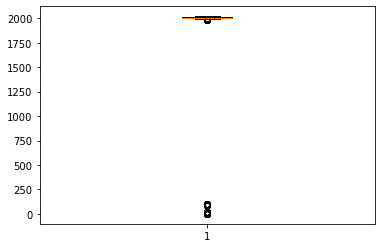

In [31]:
import matplotlib.pyplot as plt
plt.boxplot(df['Year'])
plt.show()
#이상치 존재

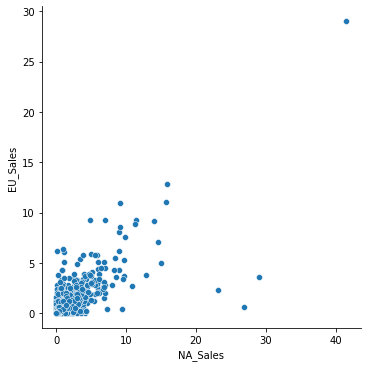

In [32]:
import seaborn as sns
sns.relplot(x="NA_Sales", y="EU_Sales",data=df)

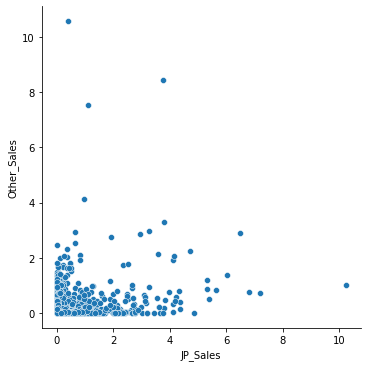

In [33]:
sns.relplot(x="JP_Sales", y="Other_Sales",data=df)

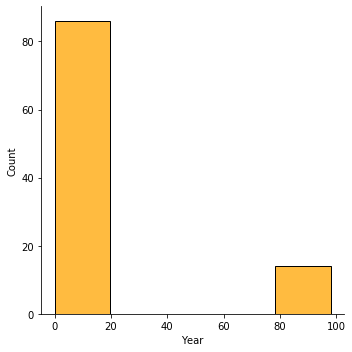

In [34]:
# Year 이상치
out = df.loc[df['Year']<100].Year
sns.displot(out,bins = 5,color = "orange")

In [ ]:
#이상치 변경
List = []
data = df['Year'].values.tolist()
for i in data:
    if i<50:
     i = i + 2000
     print(i)
    elif i<100:
     i = i+1900
     print(i)
    else:
     print(i)
    List.append(i)

In [36]:
df['Year'] = List

In [37]:
df['Year'] = round(df.Year,0)

In [38]:
#이상치 제거
rem = df['NA_Sales'] >20
df = df[~rem]
rem2 = df['JP_Sales'] >8
df = df[~rem2]
rem3 = df['EU_Sales'] >20
df = df[~rem3]
rem4 = df['Other_Sales'] >6
df = df[~rem4]

In [39]:
df.describe()
#Na_Sales가 가장 출고량이 많음

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16591.000000,16591.000000,16591.000000,16591.000000,16591.000000
mean,2006.447351,0.256075,0.144014,0.076199,0.046312
std,5.801767,0.653682,0.446791,0.291270,0.145433
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.035000
max,2020.000000,15.850000,12.880000,7.200000,4.140000


# Feature Engineering

In [40]:
#NEW feature 생성
df['all_sales'] = (df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales'])
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,all_sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [41]:
df['all_sales'].describe()

count    16591.000000
mean         0.522600
std          1.314409
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         35.830000
Name: all_sales, dtype: float64

## 나라별 출고량

<ipython-input-42-b8ab7ff38d57>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = df.groupby('Year')['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum()


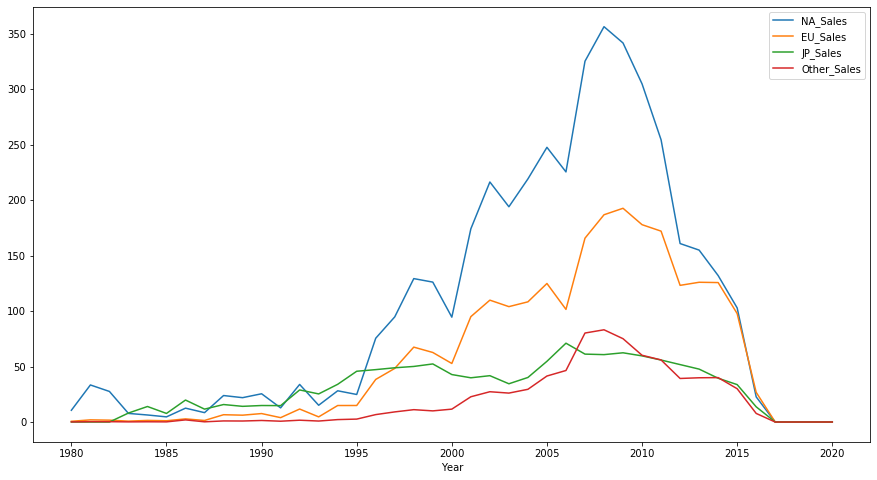

In [42]:

import matplotlib.pyplot as plt
data = df.groupby('Year')['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum()
fig, ax = plt.subplots(figsize=(15, 8))
data.plot(ax=ax);

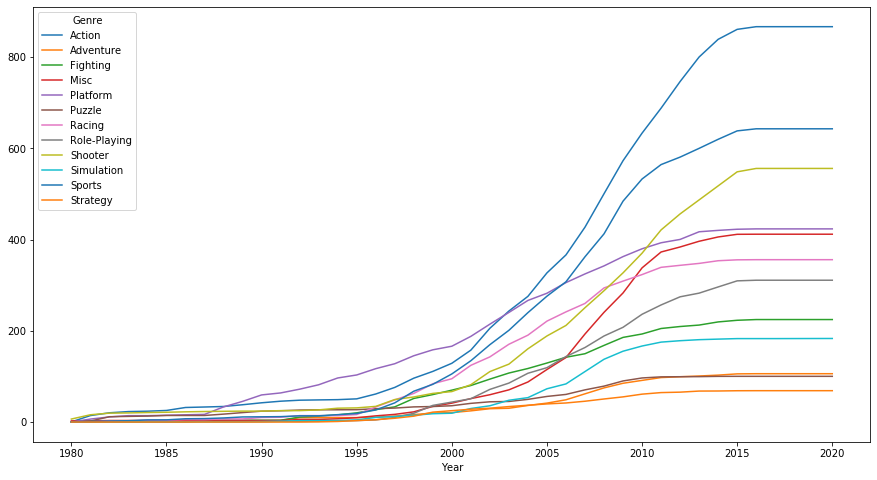

In [43]:
#북미지역 누적 장르 출고량 
%matplotlib inline
import matplotlib.pyplot as plt
total_game = df.pivot_table(values="NA_Sales", index="Year", columns="Genre",aggfunc=sum)
total_game = total_game.fillna(0)
gen_cdf = np.cumsum(total_game)
fig, ax = plt.subplots(figsize=(15, 8))
gen_cdf.plot(ax=ax);


[(0, 8)]

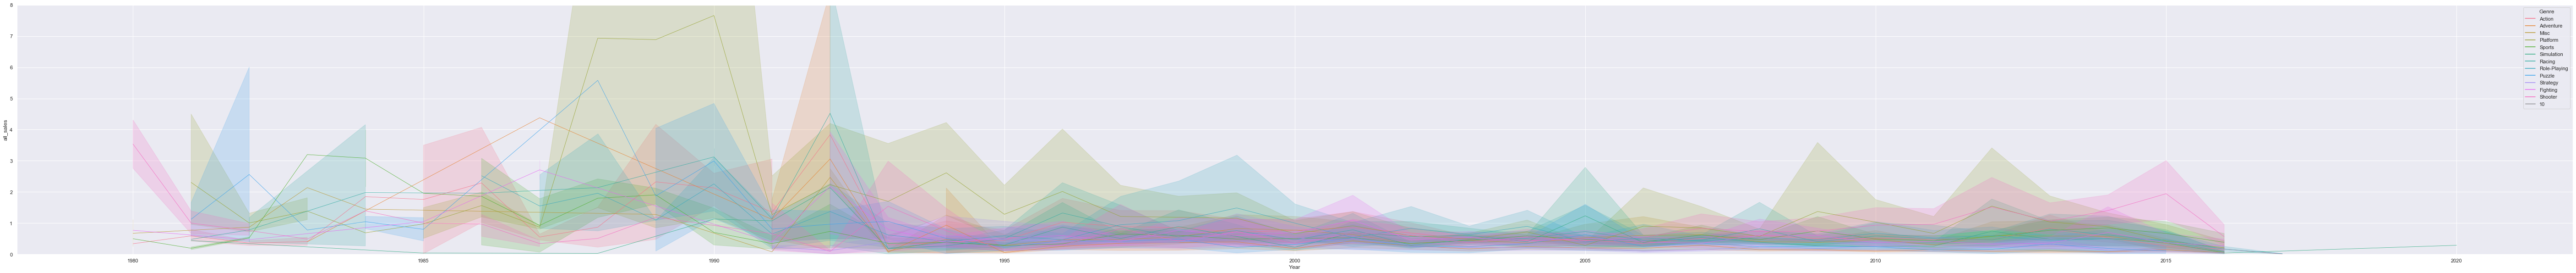

In [44]:
# seaborn 그래프로 나타내보기(누적 x)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

fig,ax = plt.subplots(figsize=(100,10))
sns.lineplot(x="Year",y="all_sales",hue="Genre",size = 10 ,data=df)
ax.set(ylim=(0, 8))

## 나라별 누적 출고량

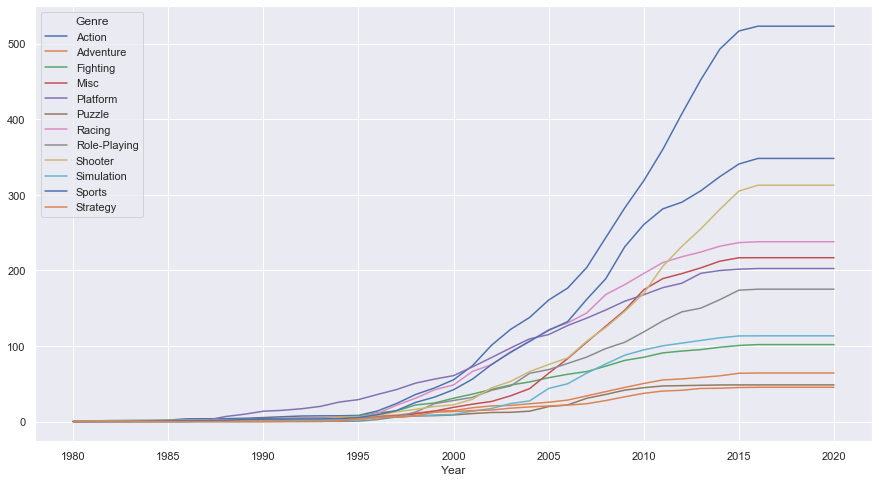

In [45]:
#유럽지역 누적 장르 출고량 
total_game = df.pivot_table(values="EU_Sales", index="Year", columns="Genre",aggfunc=sum)
total_game = total_game.fillna(0)
gen_cdf = np.cumsum(total_game)
fig, ax = plt.subplots(figsize=(15, 8))
gen_cdf.plot(ax=ax);


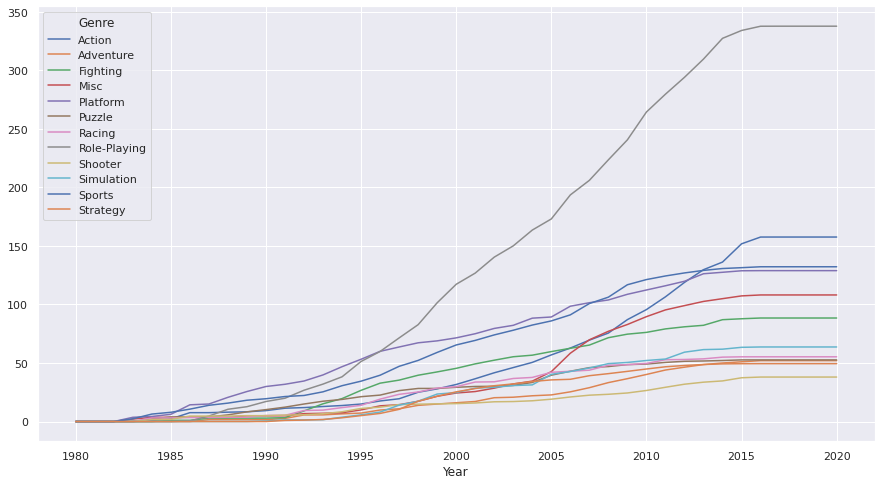

In [ ]:
#일본지역 누적 장르 출고량 
%matplotlib inline
import matplotlib.pyplot as plt
total_game = df.pivot_table(values="JP_Sales", index="Year", columns="Genre",aggfunc=sum)
total_game = total_game.fillna(0)
gen_cdf = np.cumsum(total_game)
fig, ax = plt.subplots(figsize=(15, 8))
gen_cdf.plot(ax=ax);


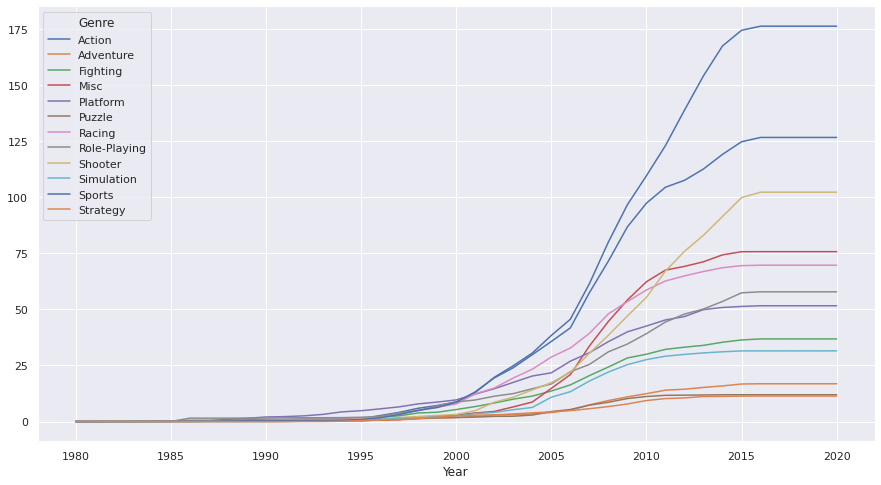

In [ ]:
#기타지역 누적 장르 출고량 
%matplotlib inline
import matplotlib.pyplot as plt
total_game = df.pivot_table(values="Other_Sales", index="Year", columns="Genre",aggfunc=sum)
total_game = total_game.fillna(0)
gen_cdf = np.cumsum(total_game)
fig, ax = plt.subplots(figsize=(15, 8))
gen_cdf.plot(ax=ax);

## 각 연도 장르별 게임의 총 출고량

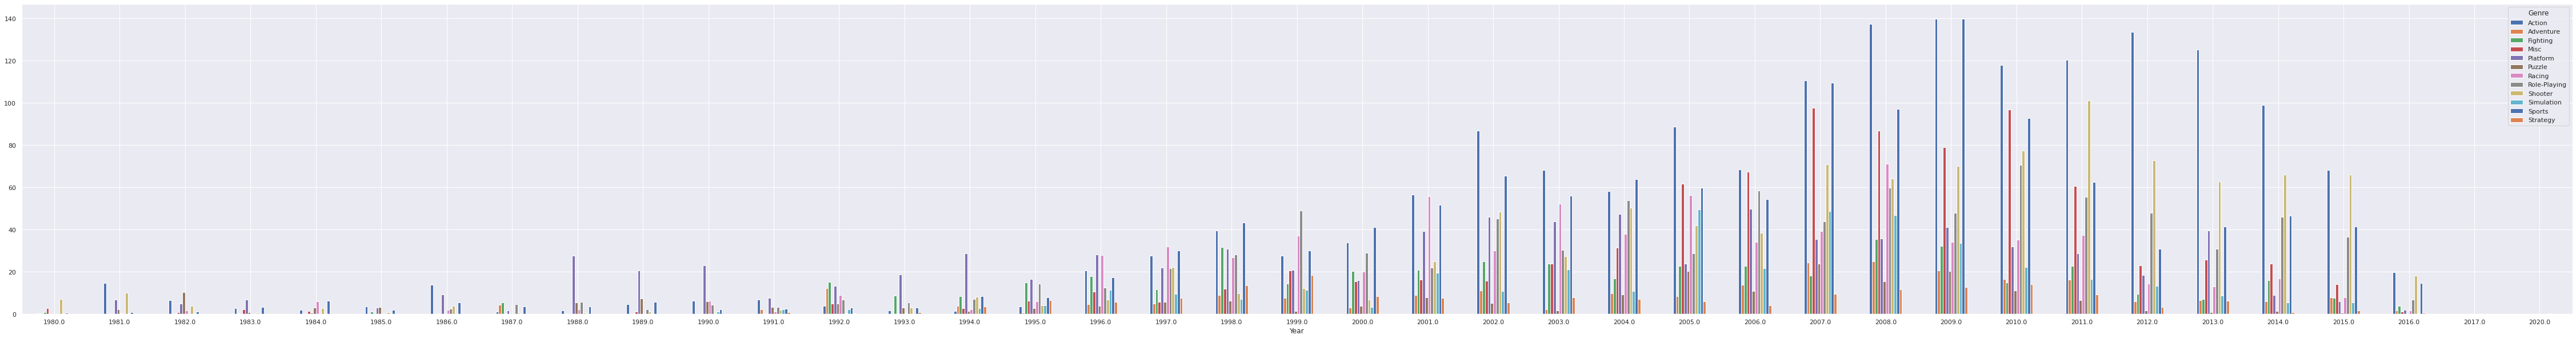

In [ ]:

total_game = df.pivot_table(values="all_sales", index="Year", columns="Genre",aggfunc=sum)
fig, ax = plt.subplots(figsize=(80, 10))
total_game.plot.bar(rot=0,ax=ax)


## 각 연도 장르별 게임의 북미 출고량

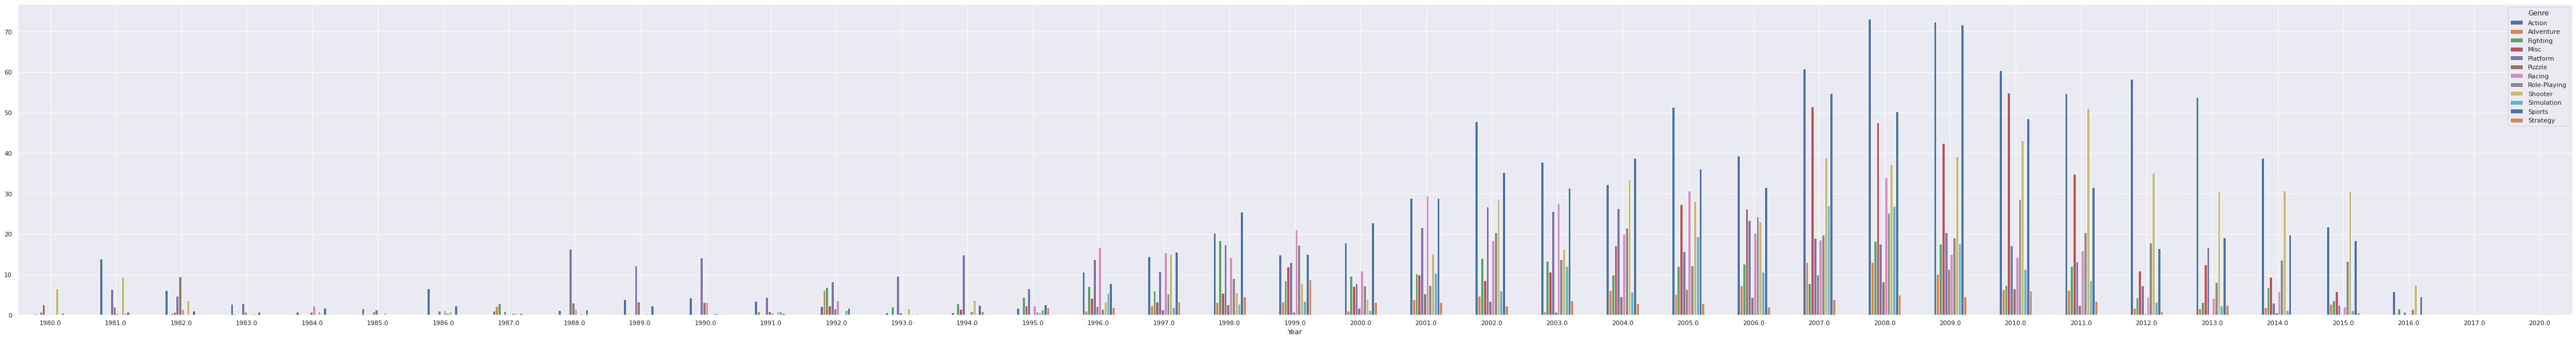

In [ ]:
#각 연도 장르별 게임의 북미지역 출고량
total_game = df.pivot_table(values="NA_Sales", index="Year", columns="Genre",aggfunc=sum)
fig, ax = plt.subplots(figsize=(80, 10))
total_game.plot.bar(rot=0,ax=ax)


## 각 연도 장르별 게임의 영국 출고량

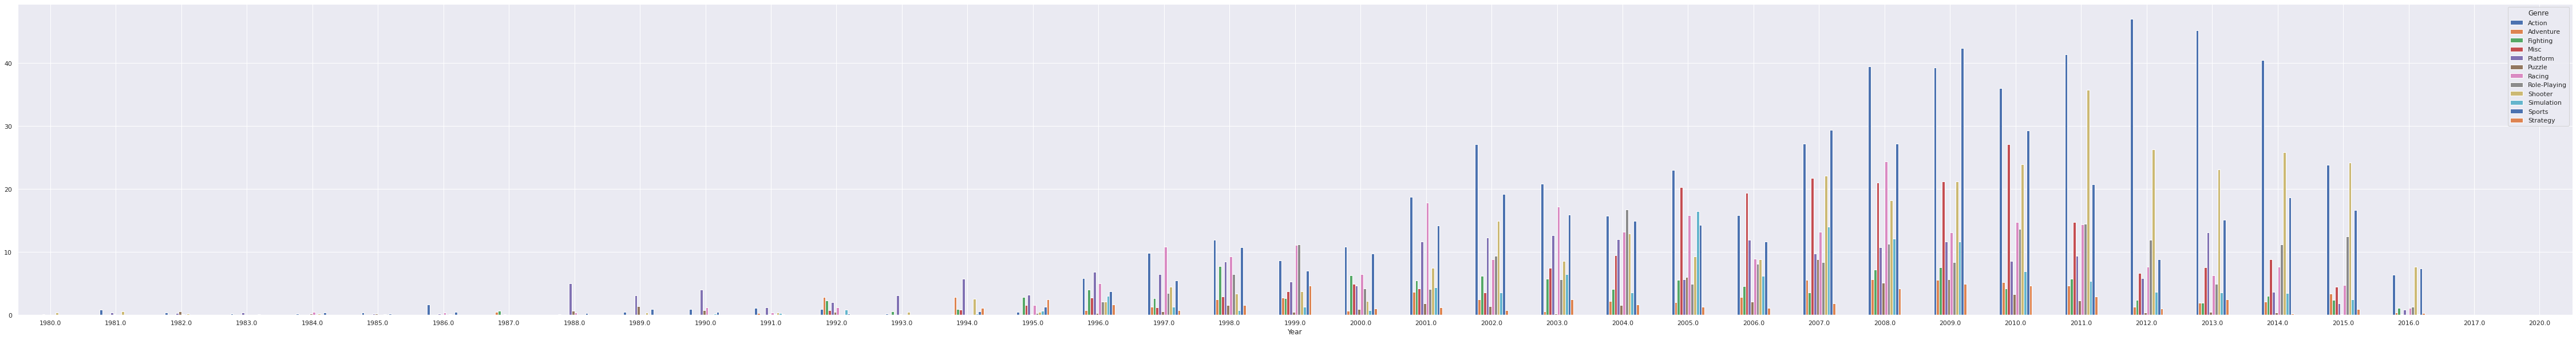

In [ ]:
#각 연도 장르별 게임의 영국지역 출고량
total_game = df.pivot_table(values="EU_Sales", index="Year", columns="Genre",aggfunc=sum)
fig, ax = plt.subplots(figsize=(80, 10))
total_game.plot.bar(rot=0,ax=ax)


## 각 연도 장르별 게임의 일본 출고량

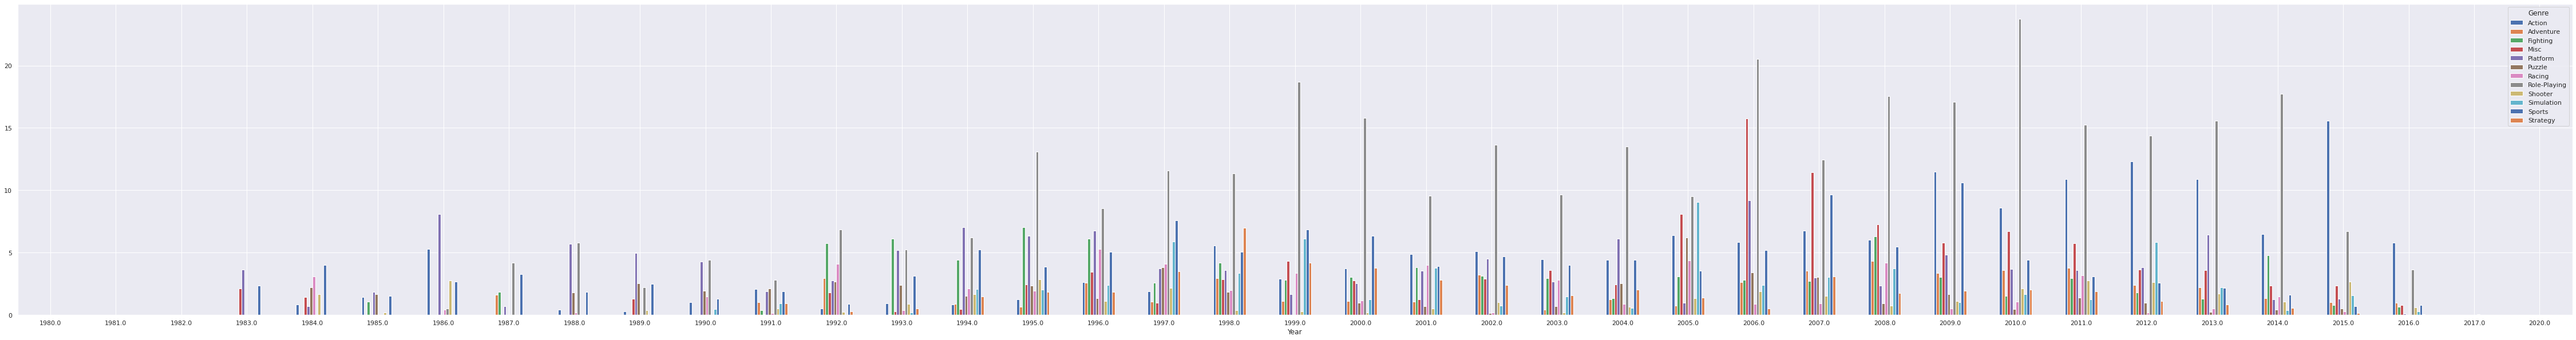

In [ ]:
#각 연도 장르별 게임의 일본지역 출고량
total_game = df.pivot_table(values="JP_Sales", index="Year", columns="Genre",aggfunc=sum)
fig, ax = plt.subplots(figsize=(80, 10))
total_game.plot.bar(rot=0,ax=ax)


## 각 연도 장르별 게임의 기타 출고량

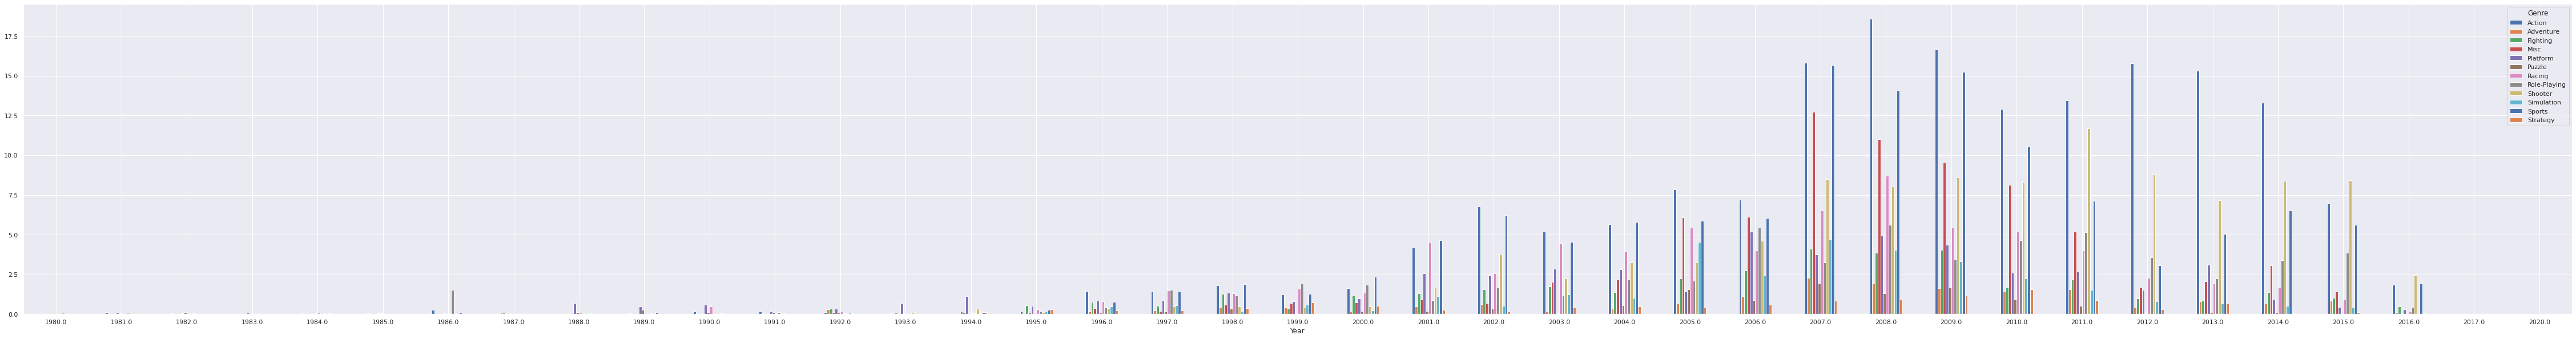

In [ ]:
#각 연도 장르별 게임의 기타지역 출고량
total_game = df.pivot_table(values="Other_Sales", index="Year", columns="Genre",aggfunc=sum)
fig, ax = plt.subplots(figsize=(80, 10))
total_game.plot.bar(rot=0,ax=ax)


## 각 연도 플랫폼별 게임의 총 출고량

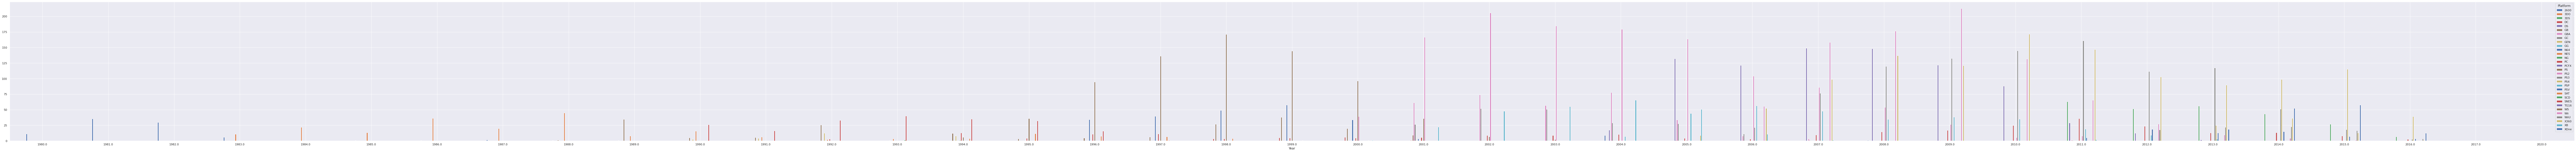

In [ ]:
#각 연도 플랫폼 별 게임의 총 출고량
total_game = df.pivot_table(values="all_sales", index="Year", columns="Platform",aggfunc=sum)
fig, ax = plt.subplots(figsize=(180, 10))
total_game.plot.bar(rot=0,ax=ax)

In [ ]:
#북미 지역 플랫폼 총 출고량
#total_game = df.pivot_table(values="NA_Sales", index="Year", columns="Platform",aggfunc=sum)
#fig, ax = plt.subplots(figsize=(300, 30))
#total_game.plot.bar(rot=0,ax=ax)

In [ ]:
#유럽 지역 플랫폼 총 출고량
#total_game = df.pivot_table(values="EU_Sales", index="Year", columns="Platform",aggfunc=sum)
#fig, ax = plt.subplots(figsize=(200, 20))
#total_game.plot.bar(rot=0,ax=ax)

# 변수간 상관분석

In [ ]:

corr = df.corr(method='pearson')
corr

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,all_sales
Year,1.000000,-0.086834,0.010997,-0.168377,0.058678,-0.070266
NA_Sales,-0.086834,1.000000,0.786253,0.418317,0.699855,0.934716
EU_Sales,0.010997,0.786253,1.000000,0.418113,0.827679,0.915169
JP_Sales,-0.168377,0.418317,0.418113,1.000000,0.315716,0.606692
Other_Sales,0.058678,0.699855,0.827679,0.315716,1.000000,0.810002
all_sales,-0.070266,0.934716,0.915169,0.606692,0.810002,1.000000


In [ ]:
df['Genre']=df['Genre'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16591 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Name         16591 non-null  object  
 1   Platform     16591 non-null  object  
 2   Year         16591 non-null  float64 
 3   Genre        16591 non-null  category
 4   Publisher    16591 non-null  object  
 5   NA_Sales     16591 non-null  float64 
 6   EU_Sales     16591 non-null  float64 
 7   JP_Sales     16591 non-null  float64 
 8   Other_Sales  16591 non-null  float64 
 9   all_sales    16591 non-null  float64 
dtypes: category(1), float64(6), object(3)
memory usage: 1.3+ MB


In [48]:
# module 설치 

from statsmodels.formula.api import ols 
import statsmodels.api as sm 
%matplotlib inline

#아노바 분석 : 장르별 출고량이 다르다 
lm = ols('all_sales ~ Genre',data = df).fit()
sm.stats.anova_lm(lm,type =2)

,df,sum_sq,mean_sq,F,PR(>F)
Genre,11.0,440.610514,40.055501,23.531045,9.961254e-49
Residual,16579.0,28221.448114,1.702241,NaN,NaN


In [49]:
# 플랫폼별 출고량이 다르다
lm = ols('all_sales ~ Platform',data = df).fit()
sm.stats.anova_lm(lm,type =2)

,df,sum_sq,mean_sq,F,PR(>F)
Platform,30.0,991.661771,33.055392,19.782777,7.370951e-104
Residual,16560.0,27670.396856,1.670918,NaN,NaN


# 매출액을 기준으로 게임 범주화

In [ ]:
bins = [0,0.001,0.02,0.11,15.85]
label = [0,1,2,3]
df['NA_Sales'] = pd.cut(df['NA_Sales'],bins,right=False , labels= label)

In [ ]:
bins = [0,0.001,0.02,0.11,12.88]
label = [0,1,2,3]
df['EU_Sales'] = pd.cut(df['EU_Sales'],bins,right=False , labels= label)

In [ ]:
bins = [0,0.001,0.02,0.11,7.2]
label = [0,1,2,3]
df['JP_Sales'] = pd.cut(df['JP_Sales'],bins,right=False , labels= label)

In [ ]:
bins = [0,0.001,0.02,0.11,4.14]
label = [0,1,2,3]
df['Other_Sales'] = pd.cut(df['Other_Sales'],bins,right=False , labels= label)

In [ ]:
df.all_sales.describe()
bins = [0,0.06,0.17,0.47,35.83]
label = [0,1,2,3]
df['all_sales'] = pd.cut(df['all_sales'],bins,right=False , labels= label)

In [ ]:
bins = range(1980,2021,4)
label = [0,1,2,3,4,5,6,7,8,9]
df['Year'] = pd.cut(df['Year'],bins,right=False , labels= label)

In [ ]:
df['NA_Sales'].astype('category')
df['EU_Sales'].astype('category')
df['JP_Sales'].astype('category')
df['Other_Sales'].astype('category')

0        0
1        1
2        0
3        0
4        2
        ..
16593    1
16594    0
16595    3
16596    2
16597    1
Name: Other_Sales, Length: 16591, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
total_game = df.pivot_table(values="all_sales", index="Year", columns="Platform",aggfunc=sum)
total_game = total_game.fillna(0)

In [ ]:
df.Genre.value_counts()

Action          3316
Sports          2350
Misc            1740
Role-Playing    1484
Shooter         1310
Adventure       1284
Racing          1247
Platform         887
Simulation       867
Fighting         849
Strategy         680
Puzzle           577
Name: Genre, dtype: int64

In [ ]:
def bar_chart(n, featrue):
 NA = df[df['NA_Sales'] == n][featrue].value_counts()
 EU = df[df['EU_Sales'] == n][featrue].value_counts()
 JP = df[df['JP_Sales'] == n][featrue].value_counts()
 Other = df[df['Other_Sales'] == n][featrue].value_counts()
 ALL = df[df['all_sales'] == n][featrue].value_counts()
 df2 = pd.DataFrame([NA,EU,JP,Other,ALL])
 df2.index = ['NA','EU','JP','Other','ALL']
 df2.plot(kind='bar', stacked = True, figsize=(10,5))
 plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


## 출고량 높은 게임(3)의 genre와 platform

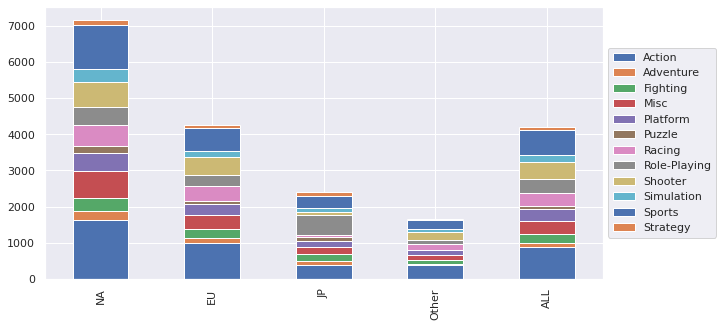

In [ ]:

bar_chart(3, 'Genre')

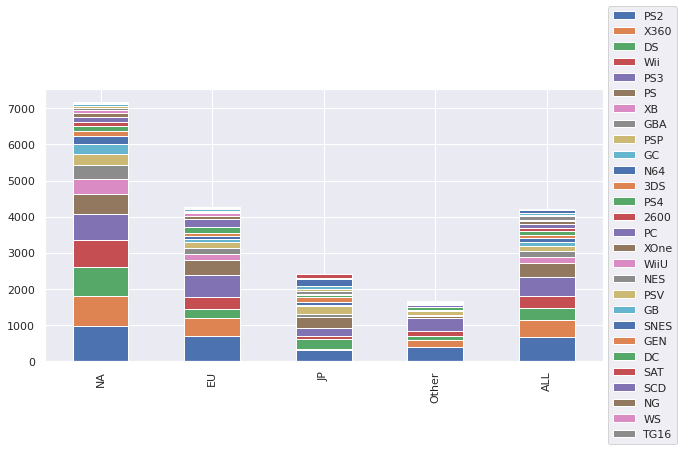

In [ ]:
#출고량 높은 게임의 platform
bar_chart(3, 'Platform')


In [ ]:
#글로벌 출고량이 상위권인 게임
sell = df[df['all_sales']==3].loc[:,'Name':'Publisher']
sell.Genre

10         Racing
20       Platform
24       Fighting
31           Misc
34       Platform
           ...   
16578    Platform
16583      Action
16587      Racing
16591      Sports
16595      Sports
Name: Genre, Length: 4212, dtype: category
Categories (12, object): ['Action', 'Adventure', 'Fighting', 'Misc', ..., 'Shooter', 'Simulation',
                          'Sports', 'Strategy']

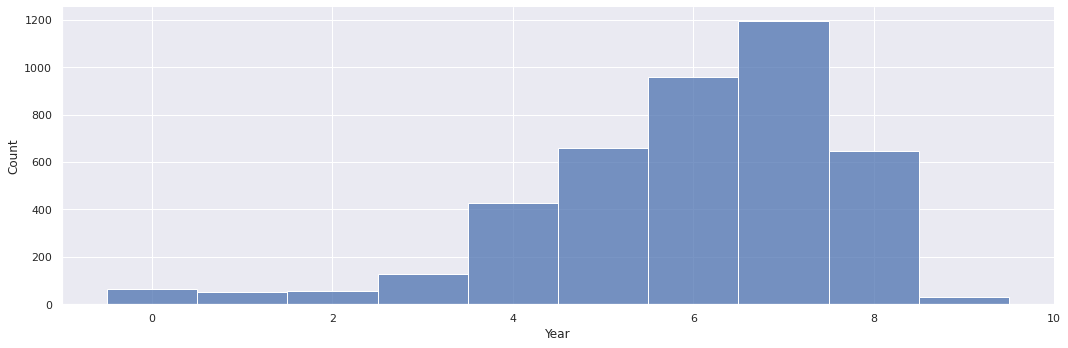

In [ ]:
import seaborn as sns
sns.set()

sns.displot(sell.Year,aspect=3)

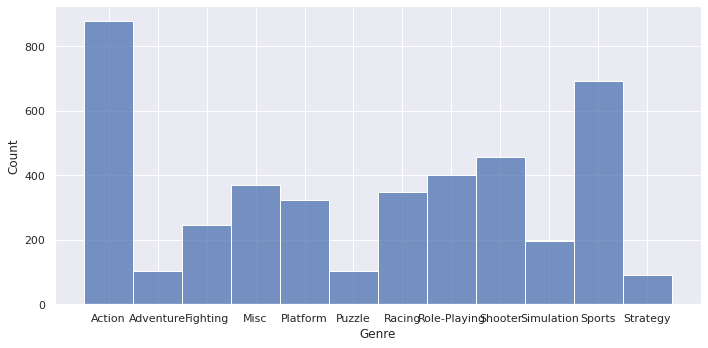

In [ ]:

import seaborn as sns
sns.set()

sns.displot(sell.Genre,aspect=2)

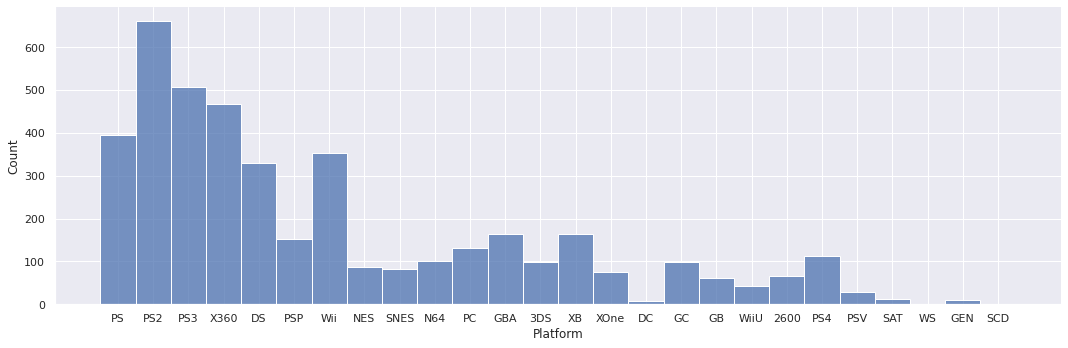

In [ ]:
import seaborn as sns
sns.set()

sns.displot(sell.Platform,aspect=3)

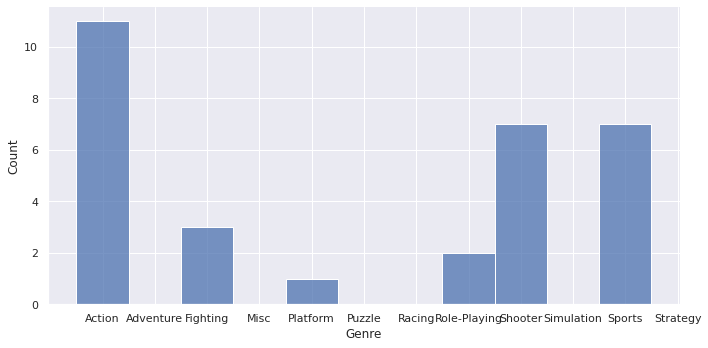

In [ ]:
#최근 출시된 출고량 높은 게임의 Platform >> 최근 트렌드인 platfrom일 가능성 높음 :1순위 PS4 2순위 XOne
recent = df[df['Year'] == 9]
platform = recent[recent['all_sales']==3]
import seaborn as sns
sns.set()

sns.displot(platform['Genre'],aspect=2)

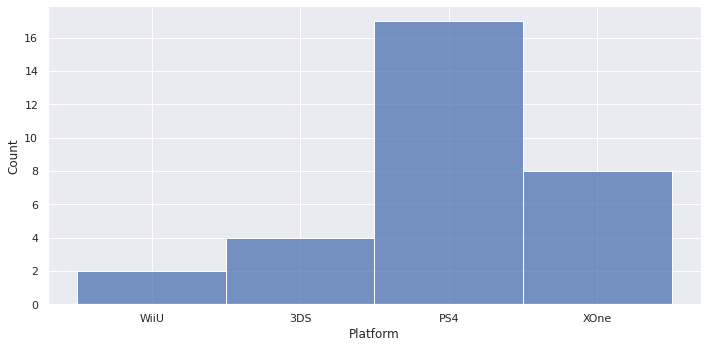

In [ ]:
recent = df[df['Year'] == 9]
platform = recent[recent['all_sales']==3]
import seaborn as sns
sns.set()

sns.displot(platform['Platform'],aspect=2)

# 게임 이름 분석

In [ ]:
recent[recent['all_sales']==3].Name.value_counts()

Doom (2016)                                  2
Madden NFL 17                                2
FIFA 17                                      2
Overwatch                                    2
NBA 2K17                                     2
Tom Clancy's The Division                    2
Far Cry: Primal                              2
No Man's Sky                                 1
The Legend of Zelda: Twilight Princess HD    1
Dark Souls III                               1
Lego Star Wars: The Force Awakens            1
Street Fighter V                             1
Yokai Watch 3                                1
Pokken Tournament                            1
EA Sports UFC 2                              1
Ratchet & Clank (2016)                       1
Naruto Shippuden: Ultimate Ninja Storm 4     1
Dragon Quest Monsters Joker 3                1
LEGO Marvel's Avengers                       1
Quantum Break                                1
Yokai Sangokushi                             1
Uncharted 4: 

## 출고량 많은 게임의 이름 길이

1    167.8
dtype: float64


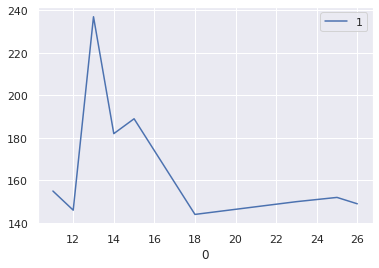

In [ ]:

namelen = []
for i in df[df.all_sales == 3].Name.tolist():
  a = len(i)
  namelen.append(a)

from collections import Counter
new = pd.DataFrame(Counter(namelen).most_common(10))
new = new.sort_values([0])
new.index = new[0]
new = new.drop([0],axis=1)
new.plot()
print(new.mean())

# 출고량 많은 게임의 이름에서 최빈 단어 추출

In [ ]:
#name 변수 소문자 바꾸기
List = []
for i in df.Name:
    i = i.lower()
    List.append(i)

In [ ]:
df.Name = List

In [ ]:
target = df[(df['NA_Sales'] == 3)&(df['Genre']=="Shooter")]

In [ ]:
#출고량 많은 게임의 이름에서 최빈 단어 수 추출
namelist = []  
for name in target.Name :
    for g in name.split() :   
       namelist.append(g)
namelist

#명사만 추출
nltk.download('averaged_perceptron_tagger')
import nltk
import pickle
from nltk.corpus import stopwords
import re

tokens_pos = nltk.pos_tag(namelist)

NN_words = []
for word, pos in tokens_pos:
    if 'NN' in pos:
        NN_words.append(word)



#원형 찾기
nltk.download("wordnet")
wlem = nltk.WordNetLemmatizer()
lemmatized_words = []
for word in NN_words:
    new_word = wlem.lemmatize(word)
    lemmatized_words.append(new_word)
lemmatized_words





#불용어 처리
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk_stopwords = stopwords.words("english")
word_token = [word for word in lemmatized_words if not word.lower() in nltk_stopwords]
word_token


#빈도 분석
from collections import Counter
c = Counter(word_token)
word_count = pd.DataFrame(c.most_common(20))
word_count 

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,0,1
0,call,58
1,war,31
2,tom,30
3,star,28
4,clancy's,25
5,duty:,23
6,ghost,20
7,medal,20
8,warfare,17
9,rainbow,16


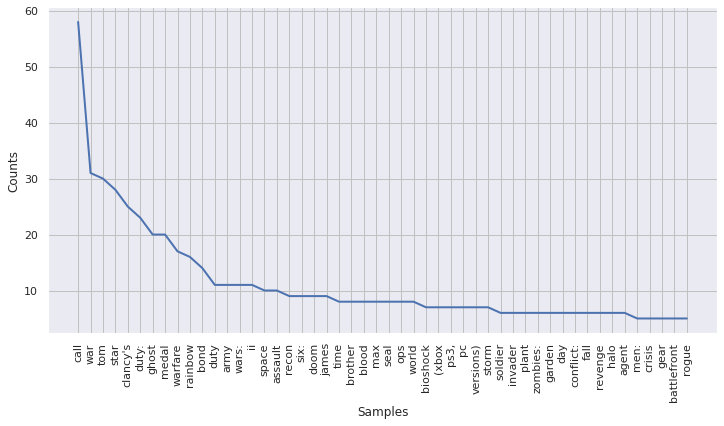

In [ ]:
from collections import Counter
import nltk
from nltk import FreqDist
count = Counter(namelist)

plt.figure(figsize=(12,6))
words = nltk.Text(word_token)
words.plot(50)
plt.show()